### Name: Shwetal More  Batch : DST 10124

### <b>Problem Statement: To develop a predictive model that accurately estimates the crop yield for various crops cultivated </b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering (include Scaling and Normalizing) 
5. cross validation
6. Train Test Split
7. Model Building
8. Model Evaluation

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


## <font color='Magenta' face='Cursive'> 1. Loading of Dataset</font>

In [53]:
crop=pd.read_csv("crop_yield.csv")
crop.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


## <font color='Magenta' face='Cursive'> 2. Data Cleaning and Preparation</font>

In [54]:
crop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [55]:
#create a copy of data set
crop_cy=crop.copy()

In [56]:
crop_cy.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

<Axes: >

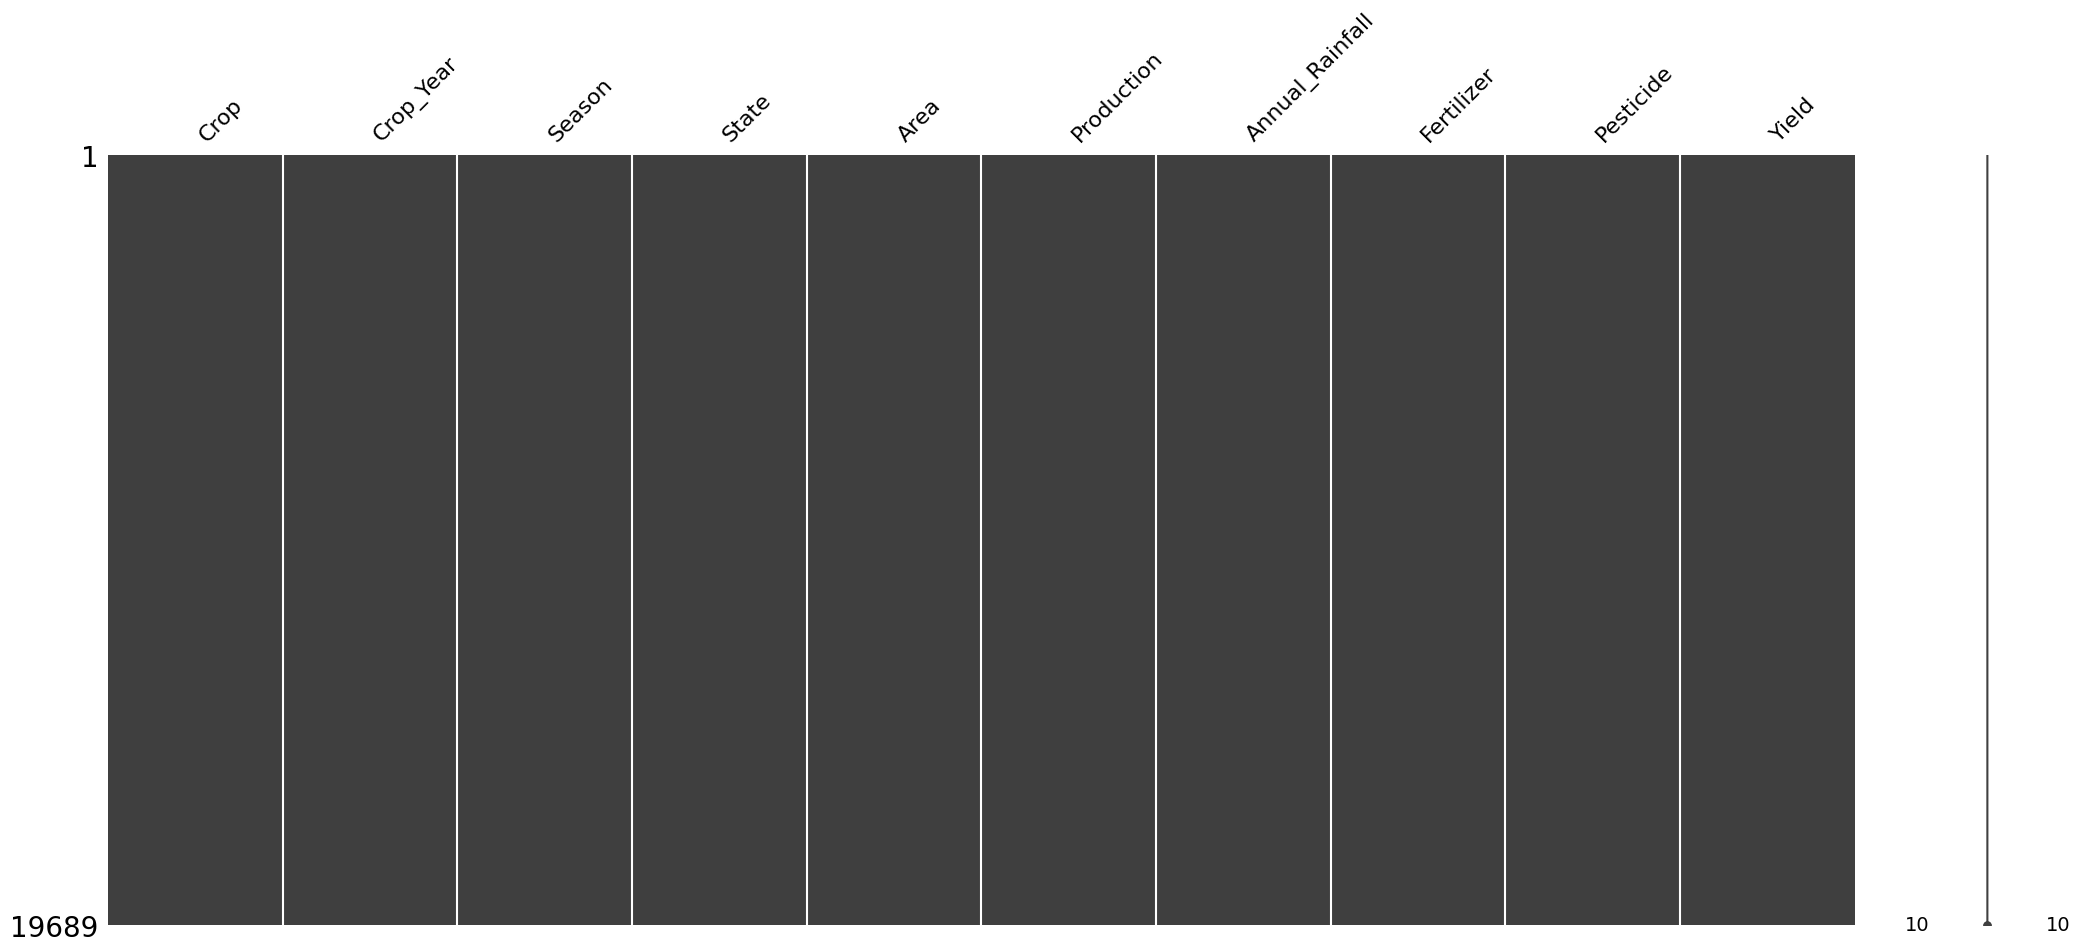

In [57]:
import missingno as msno   # check for missing values visually
msno.matrix(crop_cy)

#### AS WE CAN SEE THERE IS NO MISSING DATA IN THE DATASET

### But there are some null valuses in Dependent Variable, also the data for Year 2020 is incomplete 

In [58]:
crop_cy = crop_cy[crop_cy['Crop_Year'] != 2020] # data of 2020 is incomplete
crop_cy = crop_cy[crop_cy['Yield']>0]  # where yield is more than zero

## Removing Outliers

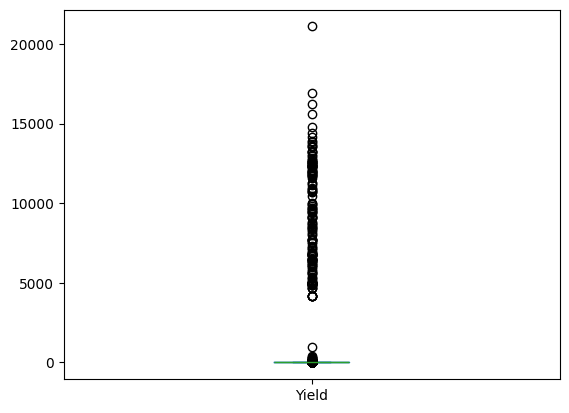

In [59]:
# Create Box Plot for Crop_Year
crop_cy['Yield']= pd.to_numeric(crop_cy['Yield'],errors='coerce')
crop_cy['Yield'].plot.box()
plt.show()

In [60]:
crop_cy.Yield.describe()

count    19540.000000
mean        80.555319
std        881.621413
min          0.003571
25%          0.603750
50%          1.037057
75%          2.410000
max      21105.000000
Name: Yield, dtype: float64

In [61]:
# Define the range for acceptable values based on mean and standard deviation
mean_production = crop_cy['Yield'].mean()
std_production = crop_cy['Yield'].std()

lower_bound = mean_production - 3 * std_production
upper_bound = mean_production + 3 * std_production

# Filter out rows where 'Production' values are outside the acceptable range
crop_cy = crop_cy[(crop_cy['Yield'] >= lower_bound) & (crop_cy['Yield'] <= upper_bound)]

# Print the shape of the filtered DataFrame to see how many outliers were removed
print("Shape of filtered DataFrame:", crop_cy.shape)

Shape of filtered DataFrame: (19376, 10)


In [62]:
Q1 = crop_cy['Yield'].quantile(0.25)
Q3 = crop_cy['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Production' values are outside the acceptable range
crop_cy = crop_cy[(crop_cy['Yield'] >= lower_bound) & (crop_cy['Yield'] <= upper_bound)]

# Print the shape of the filtered DataFrame to see how many outliers were removed
print("Shape of filtered DataFrame:", crop_cy.shape)

Shape of filtered DataFrame: (16439, 10)


In [63]:
Q1 = crop_cy['Yield'].quantile(0.25)
Q3 = crop_cy['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Production' values are outside the acceptable range
crop_cy = crop_cy[(crop_cy['Yield'] >= lower_bound) & (crop_cy['Yield'] <= upper_bound)]

# Print the shape of the filtered DataFrame to see how many outliers were removed
print("Shape of filtered DataFrame:", crop_cy.shape)

Shape of filtered DataFrame: (15467, 10)


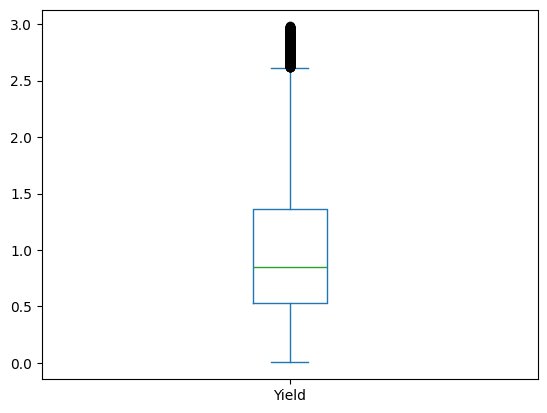

In [64]:
# Create Box Plot for Crop_Year
crop_cy['Yield']= pd.to_numeric(crop_cy['Yield'],errors='coerce')
crop_cy['Yield'].plot.box()
plt.show()

### From the above box plot
Bottom black horizontal line of blue box plot is minimum value = 0.0
First black horizontal line of rectangle shape of blue box plot is First quartile or 25% = around 0.5 yield
Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median = around 0.8 to 0.9
Third black horizontal line of rectangle shape of blue box plot is third quartile or 75% = around 1.4
Top black horizontal line of rectangle shape of blue box plot is maximum value = around 2.5
Small diamond shape of blue box plot is outlier data or erroneous data which are comparitively less then frist box plot

In [65]:
crop_cy.describe()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,15467.000000,1.546700e+04,1.546700e+04,15467.000000,1.546700e+04,1.546700e+04,15467.000000
mean,2008.947566,1.809226e+05,2.699615e+05,1428.401077,2.383565e+07,4.846985e+04,1.015931
std,6.495721,7.480811e+05,1.307408e+06,787.668577,9.290760e+07,2.139337e+05,0.658258
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.003571
25%,2003.000000,1.329500e+03,9.450000e+02,944.600000,1.810529e+05,3.431550e+02,0.526667
50%,2009.000000,9.625000e+03,7.390000e+03,1247.600000,1.263754e+06,2.481860e+03,0.845556
75%,2015.000000,8.037700e+04,6.683250e+04,1631.800000,1.049470e+07,2.094700e+04,1.362083
max,2019.000000,5.080810e+07,3.865730e+07,6552.700000,4.835407e+09,1.575051e+07,2.979298


## <font color='Magenta' face='Cursive'>3. Exploratory Data Analysis</font>

In [66]:

sp = crop_cy.Crop.value_counts()
sp

Crop
Rice                     1014
Maize                     771
Moong(Green Gram)         732
Urad                      727
Groundnut                 700
Sesamum                   681
Rapeseed &Mustard         524
Jowar                     508
Arhar/Tur                 506
Bajra                     496
Gram                      486
Small millets             483
Ragi                      480
Wheat                     454
Sunflower                 435
Cotton(lint)              417
Other Kharif pulses       378
Horse-gram                364
Other  Rabi pulses        348
Soyabean                  344
Dry chillies              342
Peas & beans (Pulses)     342
Masoor                    323
Linseed                   306
Castor seed               300
Tobacco                   285
Barley                    263
Turmeric                  202
Coriander                 192
Niger seed                189
Safflower                 168
Other Cereals             143
Arecanut                  139
Cowpe

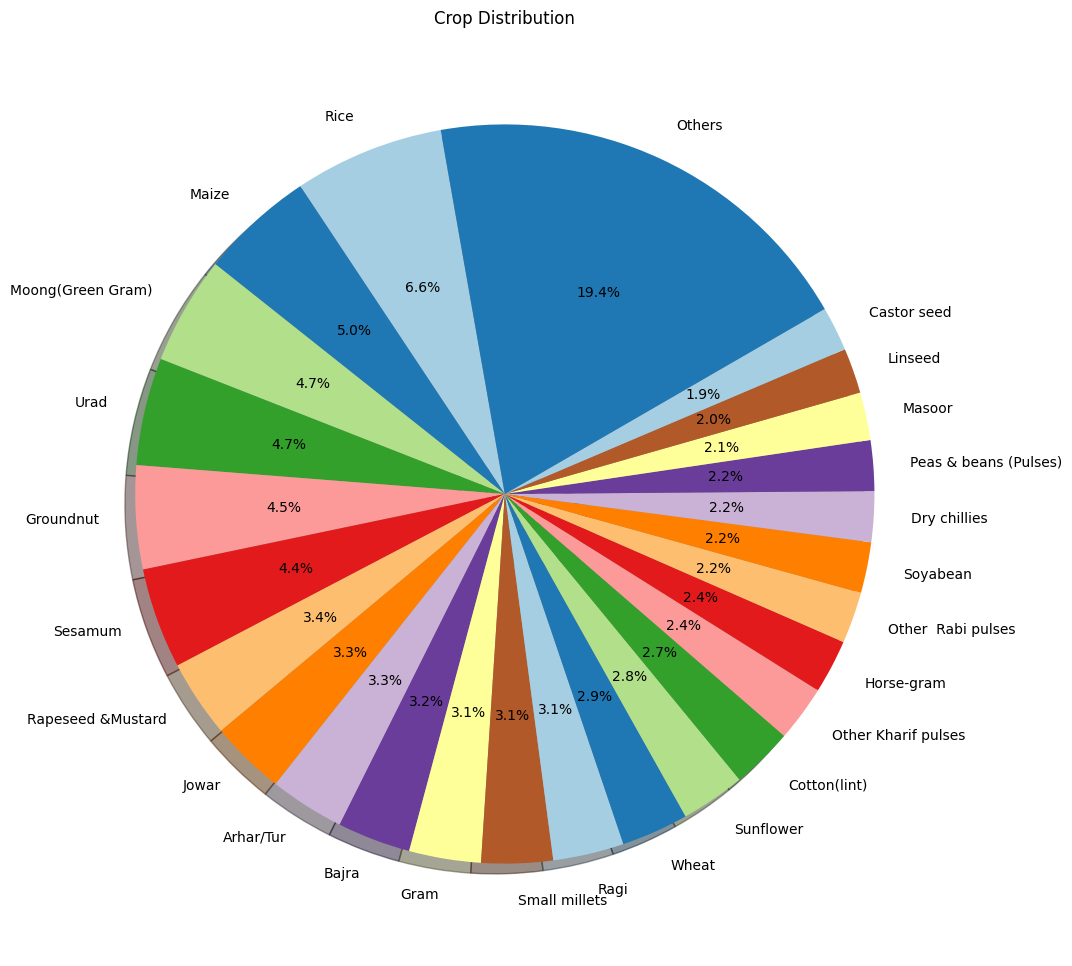

In [67]:
# Threshold to group smaller categories
threshold = 300

# Group smaller categories into 'Others'
small_counts = sp[sp < threshold]
if not small_counts.empty:
    others_sum = small_counts.sum()
    sp = sp[sp >= threshold]
    sp['Others'] = others_sum

# Create a pie chart
sp.plot(kind='pie', 
        shadow=True, 
        startangle=100, 
        autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors,  # Using a colormap for better differentiation
        figsize=(12, 12), 
        title='Crop Distribution')

plt.ylabel('')  # Remove the y-label
plt.show()

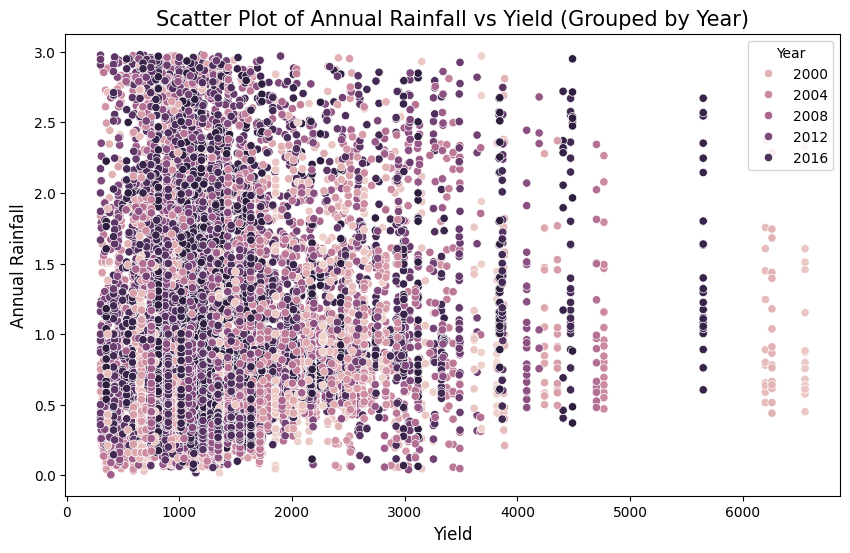

In [68]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=crop_cy, hue='Crop_Year')

# Adding title and labels
plt.title('Scatter Plot of Annual Rainfall vs Yield (Grouped by Year)', fontsize=15)
plt.xlabel('Yield', fontsize=12)
plt.ylabel('Annual Rainfall', fontsize=12)
plt.legend(title='Year')

# Display the plot
plt.show()

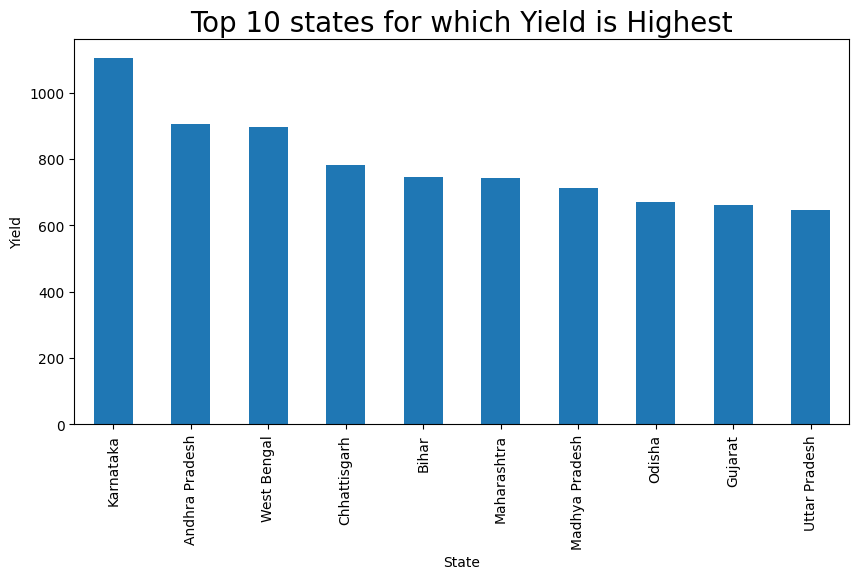

In [69]:
#Top 10 states that based on Yield
plt.figure(figsize=(10,5))
crop_cy.groupby(['State'])['Yield'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Yield')
plt.title("Top 10 states for which Yield is Highest",fontsize=20)
plt.show()

#### from above grave we can see that Karnataka has the highest yield produced 

## Year wise analysis

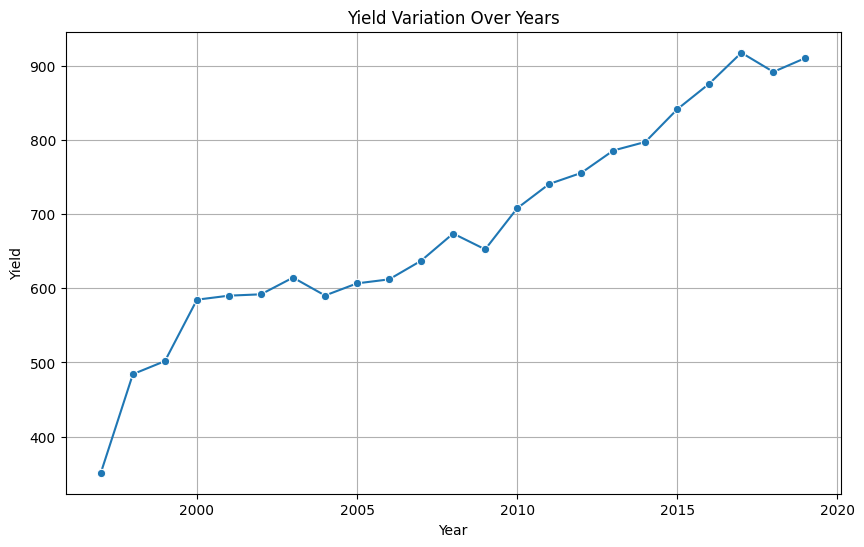

In [70]:
Cy1 = crop_cy.groupby('Crop_Year').sum()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Yield', data=Cy1, marker='o', linestyle='-')
plt.title('Yield Variation Over Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

#### As we can see the yield increase thoughout the years

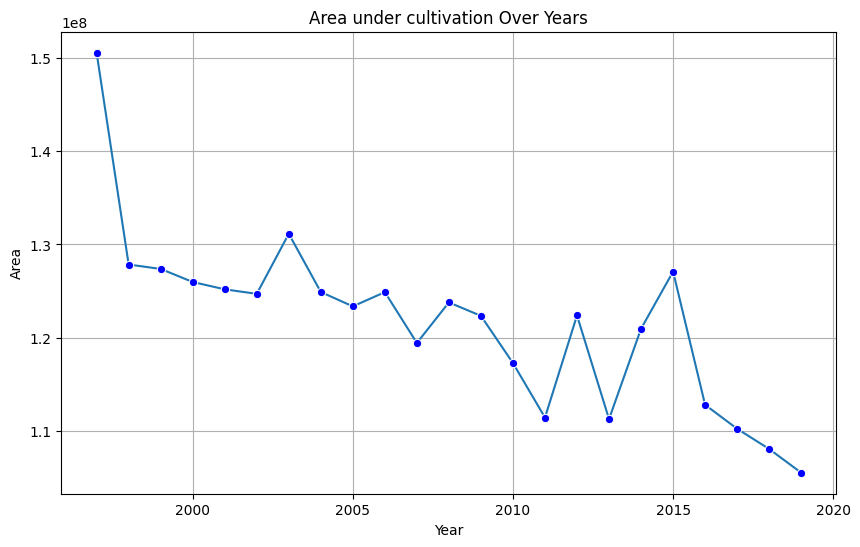

In [71]:

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Area', data=Cy1, marker='o', markerfacecolor='blue', linestyle='-')
plt.title('Area under cultivation Over Years')
plt.xlabel('Year')
plt.ylabel('Area')
plt.grid(True)
plt.show()

#### as we can see area under cultivation decrease as year increases

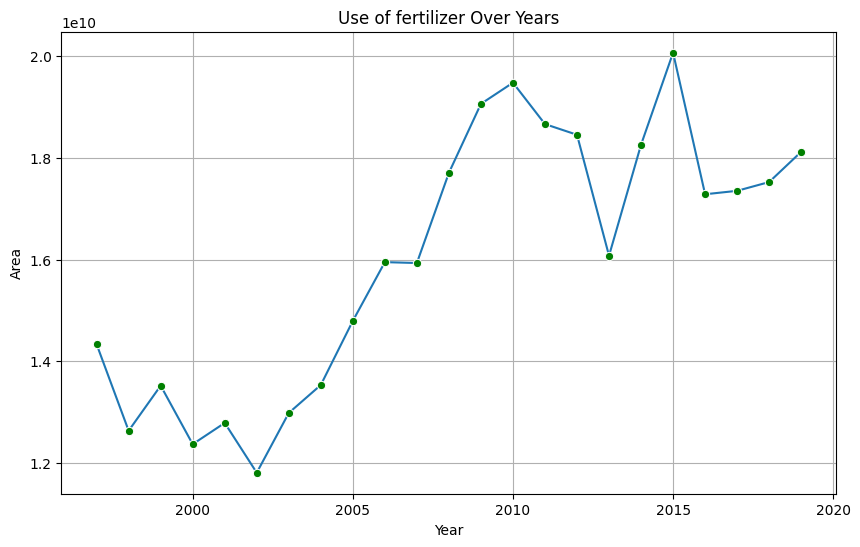

In [72]:

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Fertilizer', data=Cy1, marker='o', markerfacecolor='green', linestyle='-')
plt.title('Use of fertilizer Over Years')
plt.xlabel('Year')
plt.ylabel('Area')
plt.grid(True)
plt.show()

#### use of fertilizer has increase 

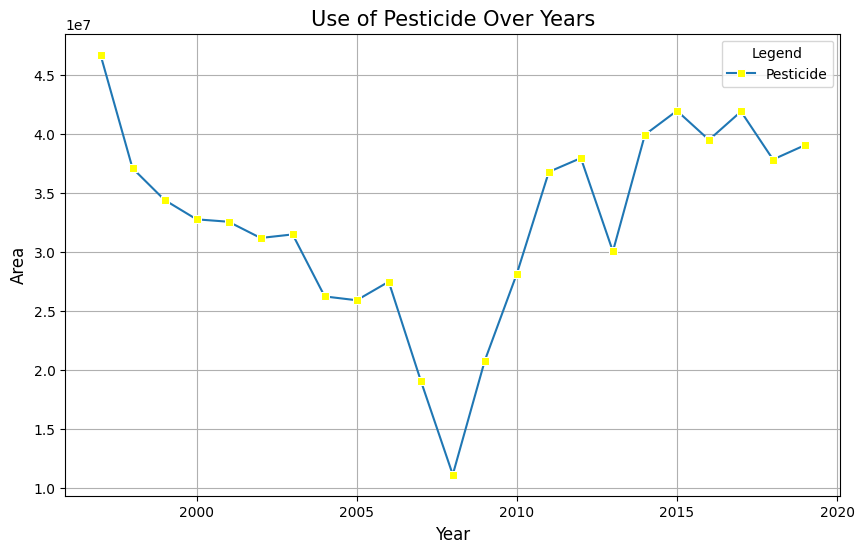

In [73]:


plt.figure(figsize=(10, 6))
# Plotting pesticide use
sns.lineplot(x='Crop_Year', y='Pesticide', data=Cy1, marker='s', markerfacecolor='yellow', linestyle='-', label='Pesticide')
# Adding title and labels
plt.title('Use of Pesticide Over Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.grid(True)
plt.legend(title='Legend')

# Display the plot
plt.show()


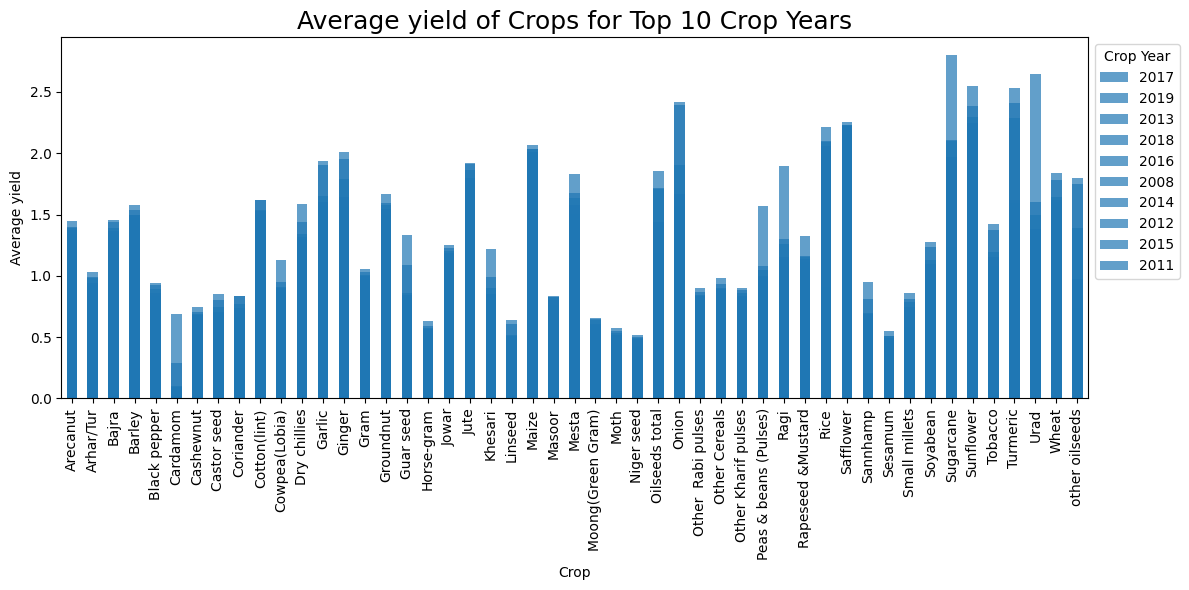

In [74]:
# Calculate the average yield of crops for each crop year
avg_Yield_by_crop_year = crop_cy.groupby(['Crop_Year', 'Crop'])['Yield'].mean()

# Find the top 10 crop years with the highest average Yield
top_10_crop_years = avg_Yield_by_crop_year.groupby('Crop_Year').mean().nlargest(10)

# Plot the average yield of crops for each of the top 10 crop years
plt.figure(figsize=(12, 6))
for crop_year in top_10_crop_years.index:
    avg_Yield_by_crop_year.loc[crop_year].plot(kind='bar', alpha=0.7, label=crop_year)

plt.xlabel('Crop')
plt.ylabel('Average yield')
plt.title("Average yield of Crops for Top 10 Crop Years", fontsize=18)
plt.legend(title='Crop Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Crop wise analysis 

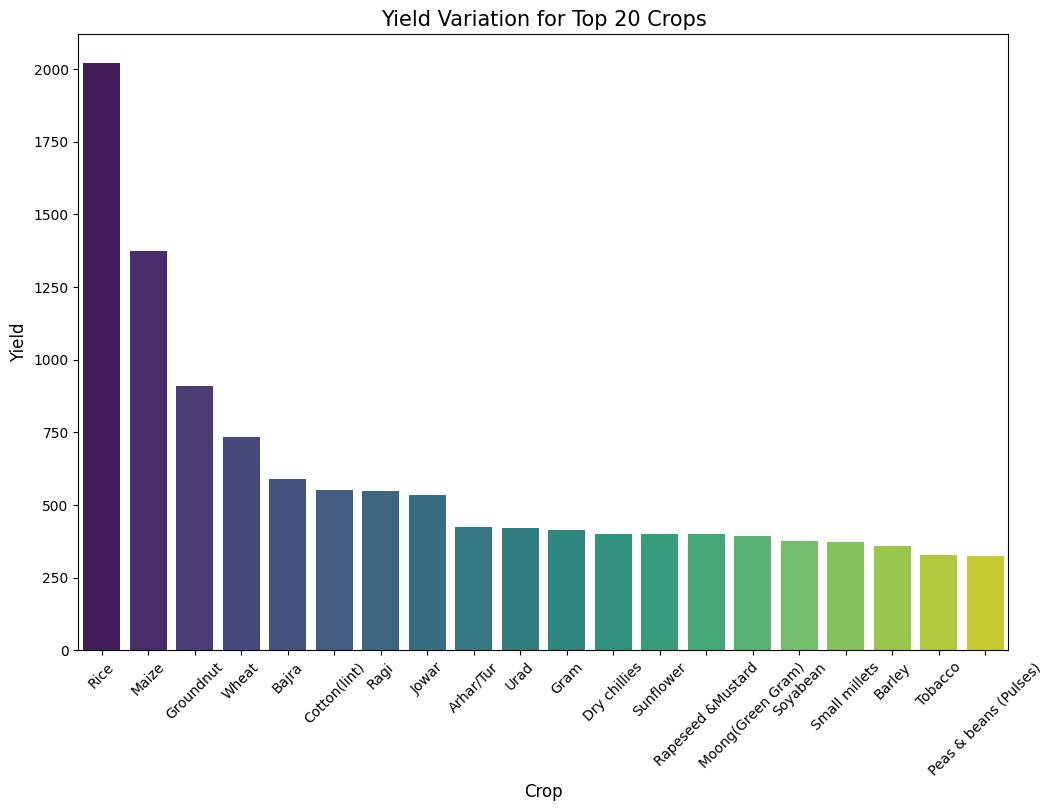

In [75]:
Cy2 = crop_cy.groupby('Crop').sum()

# Sort by 'Yield' in descending order and select the top 20 crops
top_20_crops = Cy2.sort_values(by='Yield', ascending=False).head(20)

# Reset index to have 'Crop' as a column for plotting
top_20_crops.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_crops, x='Crop', y='Yield', palette='viridis')

# Adding title and labels
plt.title('Yield Variation for Top 20 Crops', fontsize=15)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Yield', fontsize=12)
plt.xticks(rotation=45)  # Rotate crop names for better readability
plt.grid(False)

plt.show()




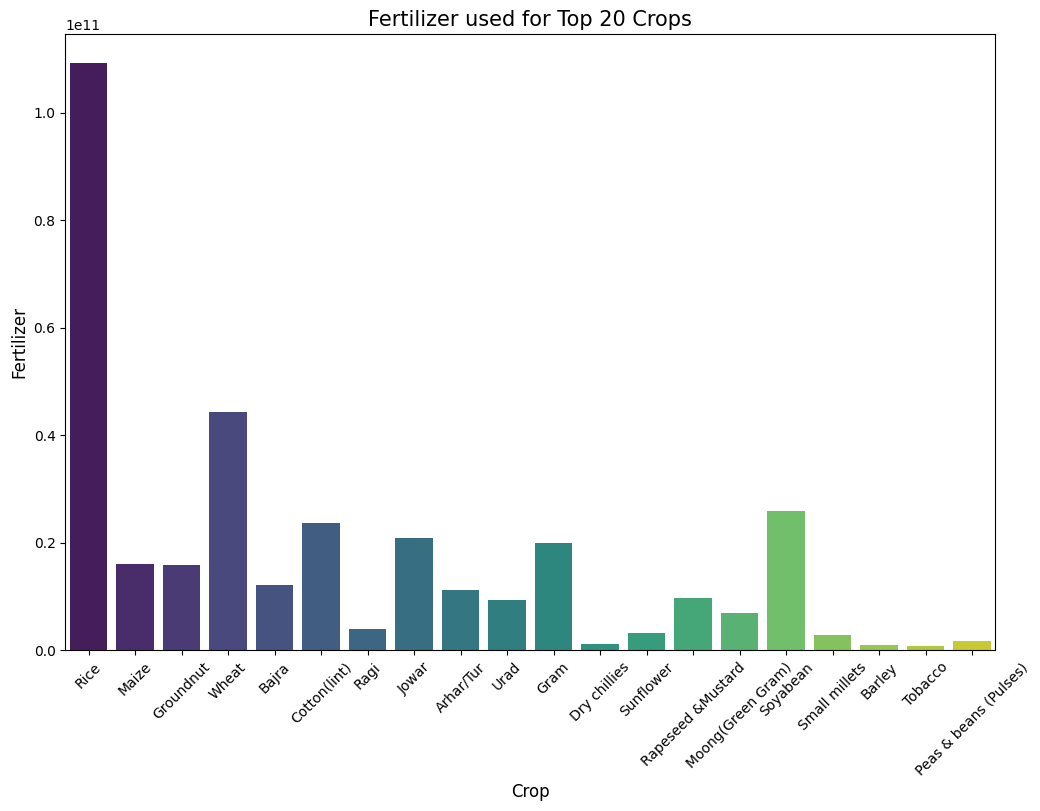

In [76]:

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_crops, x='Crop', y='Fertilizer', palette='viridis')

# Adding title and labels
plt.title('Fertilizer used for Top 20 Crops', fontsize=15)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)
plt.xticks(rotation=45)  # Rotate crop names for better readability
plt.grid(False)

plt.show()

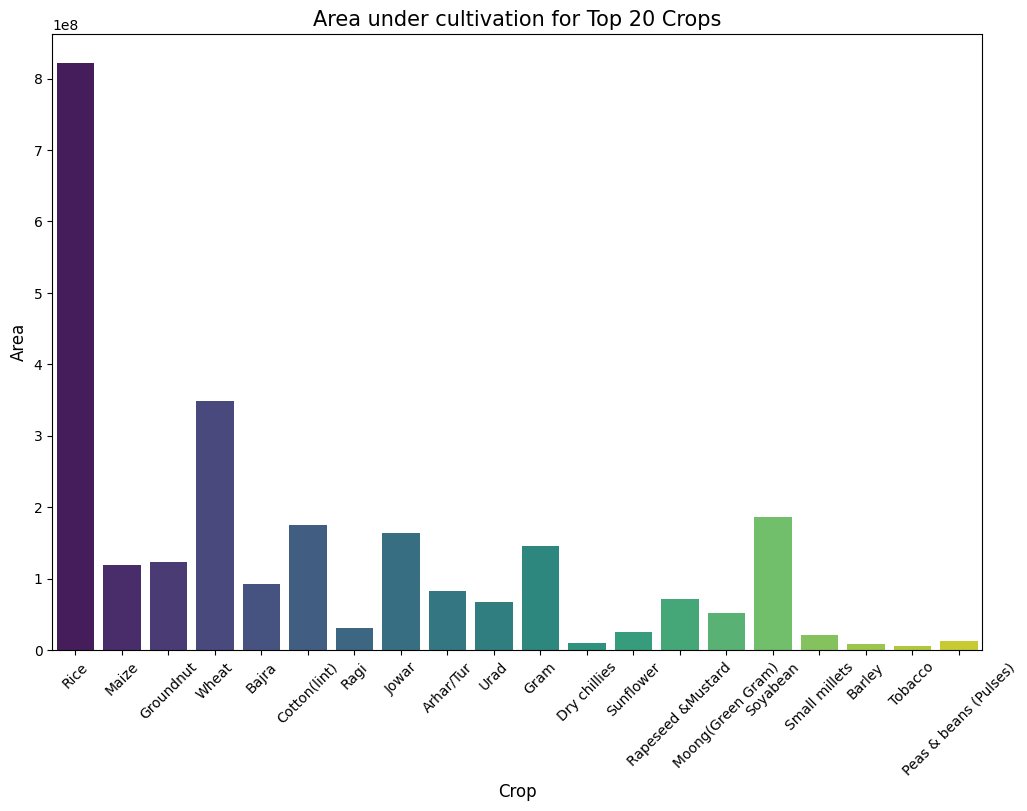

In [77]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_crops, x='Crop', y='Area', palette='viridis')

# Adding title and labels
plt.title('Area under cultivation for Top 20 Crops', fontsize=15)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.xticks(rotation=45)  # Rotate crop names for better readability
plt.grid(False)

plt.show()

## Season Wise analysis

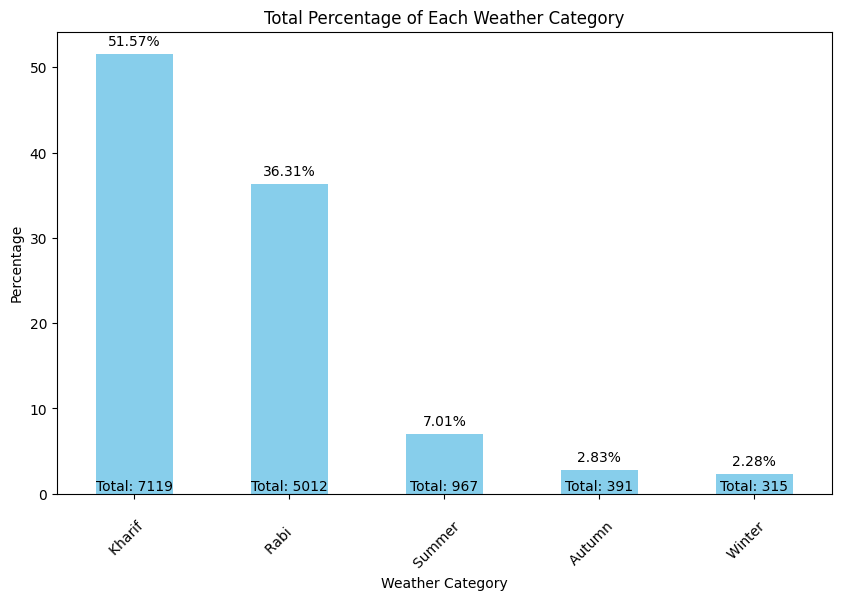

In [78]:

Cy3 = crop_cy[crop_cy['Season']!='Whole Year ']

# Get the value counts of each unique value in the weather column
season_counts = Cy3['Season'].value_counts()

# Calculate the total number of entries
total_entries = len(Cy3)

# Calculate the percentage of each unique value in the weather column
percentages = (season_counts / total_entries) * 100

# Plot the percentages using a bar plot
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar', color='skyblue')

# Add total percentage above each bar
for i, v in enumerate(percentages):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center')

    # Add total percentage above each bar
    ax.text(i, 0, f"Total: {season_counts.iloc[i]}", ha='center', va='bottom', fontsize=10)

plt.title('Total Percentage of Each Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

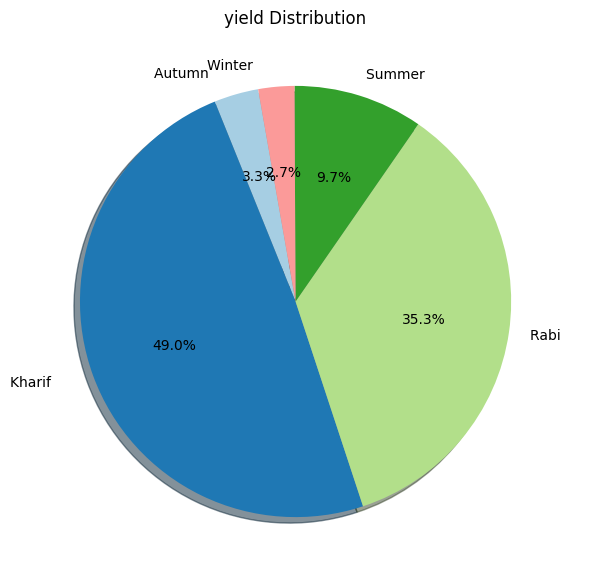

In [79]:
# Calculate the total Area for each season
total_Area_by_season = Cy3.groupby('Season')['Yield'].sum()
# Create a pie chart
total_Area_by_season.plot(kind='pie', 
        shadow=True, 
        startangle=100, 
        autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors,  # Using a colormap for better differentiation
        figsize=(7, 7), 
        title='yield Distribution')

plt.ylabel('')  # Remove the y-label
plt.show()

## State wise Annual Rainfall Analysis

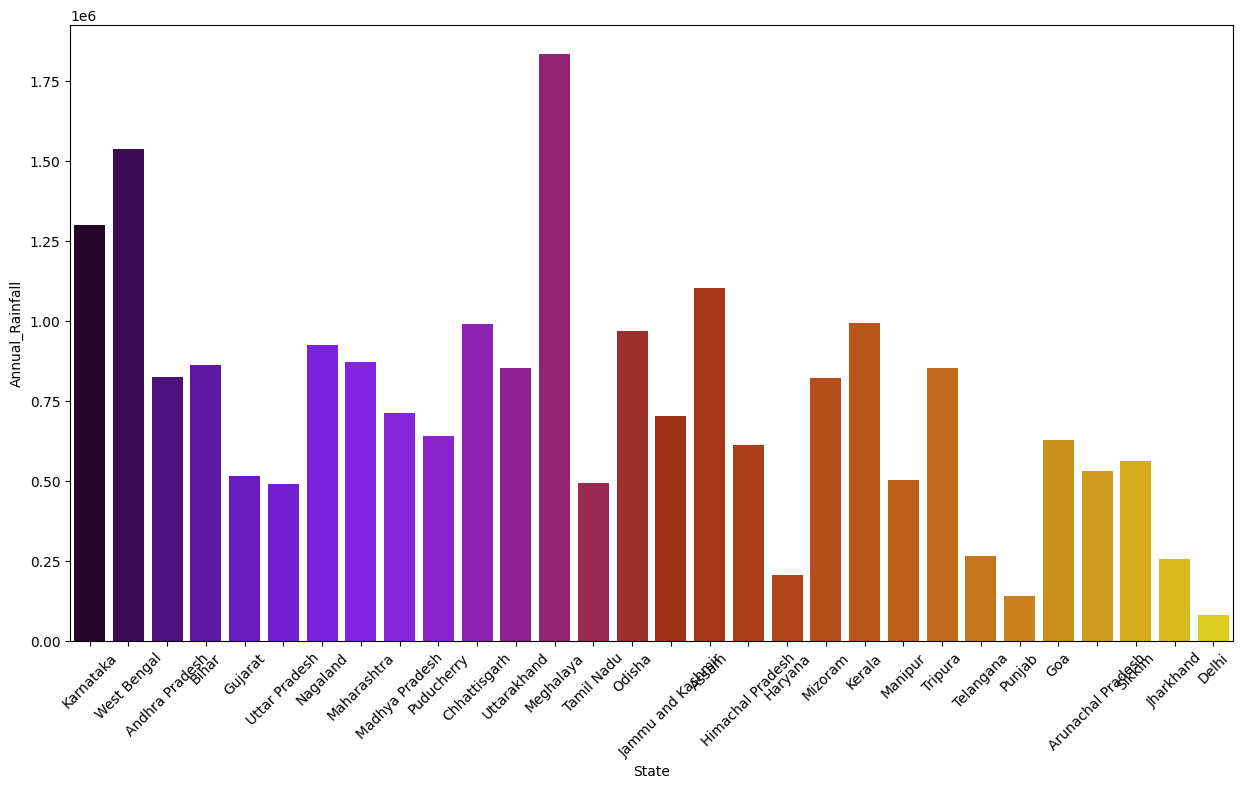

In [80]:
state = crop_cy.groupby('State').sum()
state.sort_values(by = 'Yield', inplace=True, ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(x = state.index, y=state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

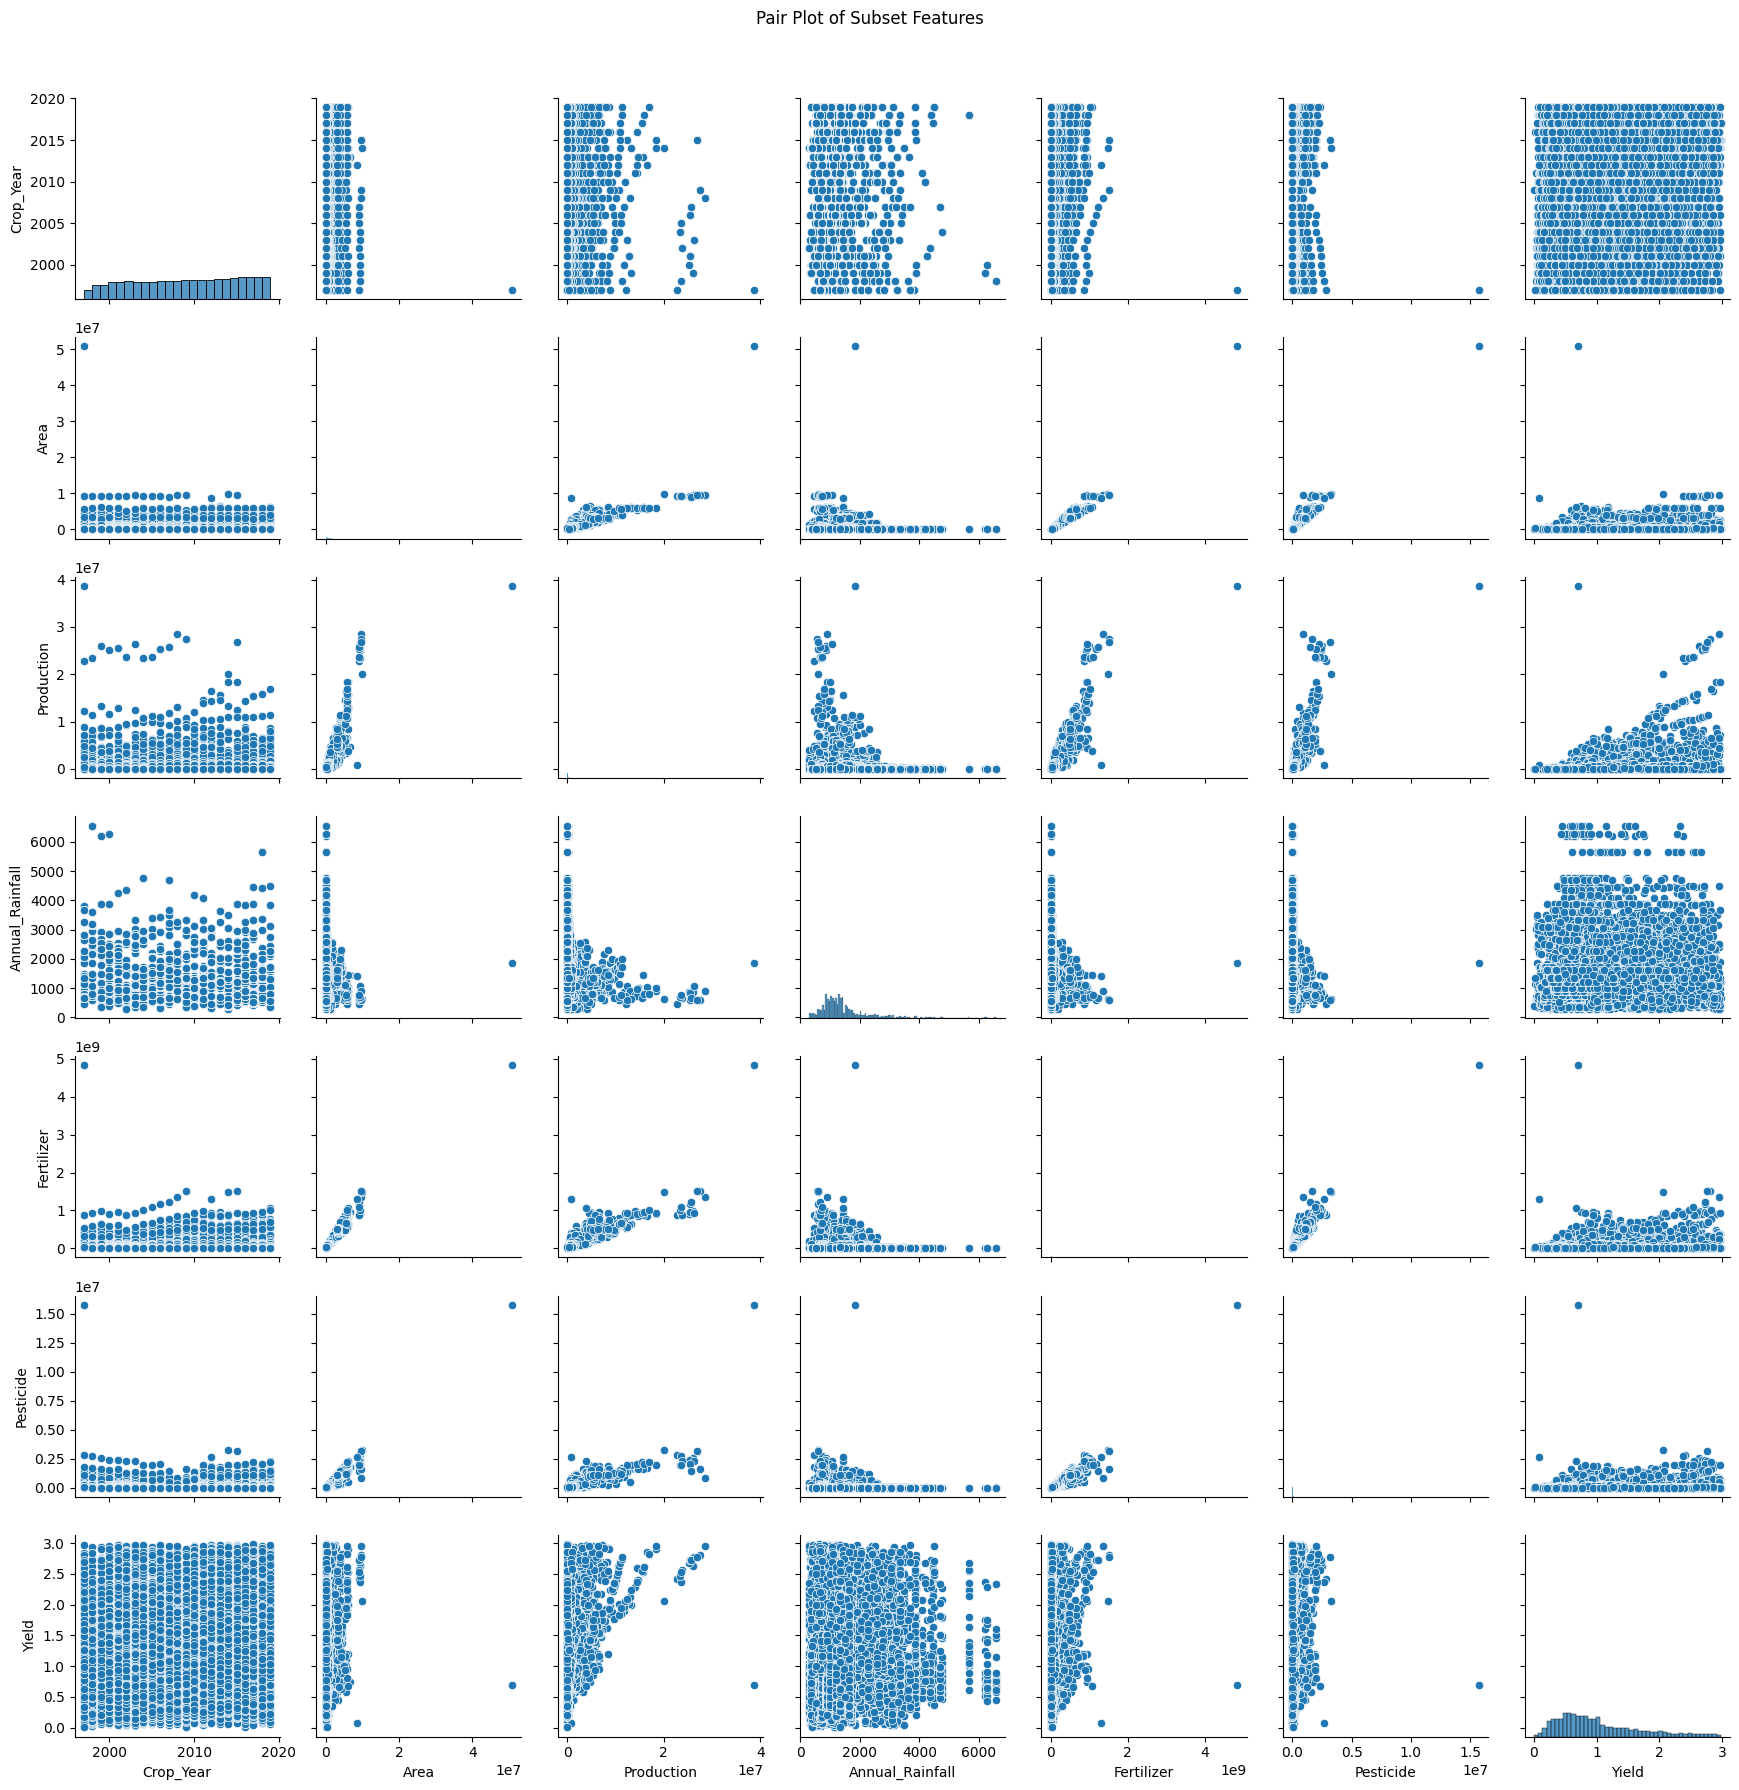

In [81]:
# Create the pair plot
plt.figure(figsize=(15, 10))
pair_plot = sns.pairplot(crop_cy)

# Adjust plot appearance
pair_plot.fig.suptitle('Pair Plot of Subset Features', y=1.02)  # Title with some spacing
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


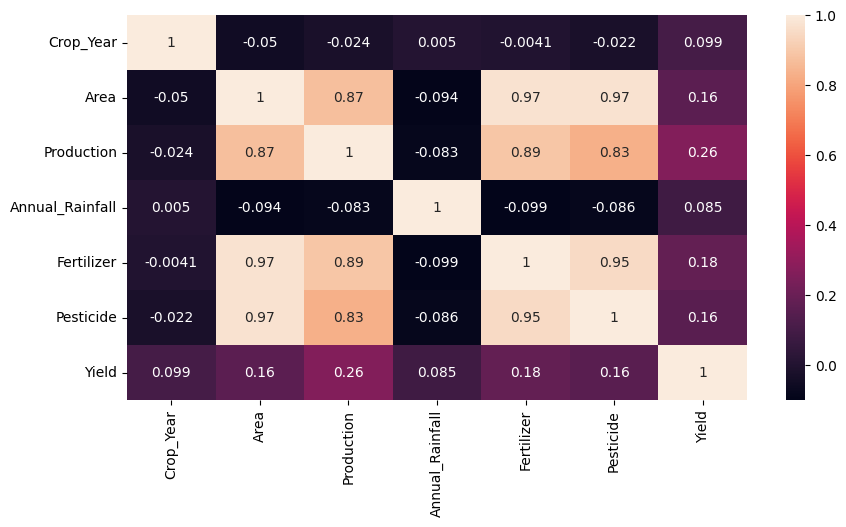

In [82]:
non_numeric_columns = ['State', 'Crop', 'Season']

# Drop non-numeric columns
agro_cy_numeric = crop_cy.drop(columns=non_numeric_columns)

# Now, plot the heatmap using the numeric DataFrame
plt.figure(figsize=(10, 5))
sns.heatmap(agro_cy_numeric.corr(), annot=True)
plt.show()


## <font color='Magenta' face='Cursive'>4. Feature Engineering</font>

In [83]:
crop_cy.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [84]:
crop_cy = crop_cy.drop(['Pesticide','Season'], axis = 1)

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# Identify non-numeric columns
non_numeric_columns = crop_cy.select_dtypes(include=['object']).columns

# Use LabelEncoder to convert categorical columns to numeric
le = LabelEncoder()
for column in non_numeric_columns:
    crop_cy[column] = le.fit_transform(crop_cy[column])
# Scale the feature
scaler = StandardScaler()
crop_cy['Crop_Year'] = scaler.fit_transform(crop_cy[['Crop_Year']])
crop_cy['Area'] = scaler.fit_transform(crop_cy[['Area']])
crop_cy['Production'] = scaler.fit_transform(crop_cy[['Production']])
crop_cy['Annual_Rainfall'] = scaler.fit_transform(crop_cy[['Annual_Rainfall']])
crop_cy['Fertilizer'] = scaler.fit_transform(crop_cy[['Fertilizer']])
crop_cy['Yield'] = scaler.fit_transform(crop_cy[['Yield']])



In [86]:
crop_cy.describe()

,Crop,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Yield
count,15467.000000,1.546700e+04,15467.000000,1.546700e+04,1.546700e+04,1.546700e+04,1.546700e+04,1.546700e+04
mean,27.761880,-5.292204e-16,14.360509,4.042656e-17,2.021328e-17,-3.528136e-16,2.572599e-17,2.940113e-17
std,15.448764,1.000032e+00,8.914293,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,0.000000,-1.839357e+00,0.000000,-2.418561e-01,-2.064927e-01,-1.430979e+00,-2.565599e-01,-1.537987e+00
25%,16.000000,-9.156425e-01,7.000000,-2.400795e-01,-2.057699e-01,-6.142389e-01,-2.546117e-01,-7.432959e-01
50%,26.000000,8.072377e-03,14.000000,-2.289901e-01,-2.008401e-01,-2.295470e-01,-2.429578e-01,-2.588367e-01
75%,41.000000,9.317872e-01,21.000000,-1.344090e-01,-1.553727e-01,2.582374e-01,-1.435984e-01,5.258774e-01
max,53.000000,1.547597e+00,29.000000,6.767824e+01,2.936236e+01,6.505864e+00,5.179045e+01,2.982766e+00


## <font color='Magenta' face='Cursive'>5. Spliting of data into diferent sets</font>

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [89]:
# Assuming crop_cy is your DataFrame and "Yield" is the continuous target variable
# Select features (X) and target variable (y)
X = crop_cy.loc[:, crop_cy.columns != "Yield"].astype(int).values
y = crop_cy["Yield"].values

# Convert continuous target variable to categorical using pd.cut
# Example: Create 3 categories for simplicity
y_binned = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])

# Splitting data set - 30% test dataset and 70% train dataset
x_train, x_test, y_train, y_test = train_test_split(X, y_binned, train_size=0.7, random_state=42)

# Check shapes of the train and test sets
print("x_train :", x_train.shape)
print("x_test  :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

x_train : (10826, 7)
x_test  : (4641, 7)
y_train : (10826,)
y_test  : (4641,)



## <font color='Magenta' face='Cursive'>6. Cross validation</font>

In [90]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Initialize KFold with 5 splits
kfold = KFold(n_splits=5, shuffle=False)

# List to store accuracy scores for each fold
cross_validation_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kfold.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    # Split the data into training and validation sets for this fold
    x_train_kf, x_val_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]
    
    # Initialize and train the KNN model
    model_cv = KNeighborsClassifier(n_neighbors=5)
    model_cv.fit(x_train_kf, y_train_kf)
    
    # Evaluate the model on the validation set
    acc = round(model_cv.score(x_val_kf, y_val_kf) * 100, 2)
    cross_validation_scores.append(acc)
    
    # Print the accuracy for this fold
    print(f'Fold accuracy: {acc:.2f}%')

# Calculate the average accuracy across all folds
average_accuracy = round(sum(cross_validation_scores) / len(cross_validation_scores), 2)

# Print the average accuracy
print('Cross-Validation Average Accuracy:', average_accuracy)


TRAIN: [ 2166  2167  2168 ... 10823 10824 10825] TEST: [   0    1    2 ... 2163 2164 2165]
Fold accuracy: 82.36%
TRAIN: [    0     1     2 ... 10823 10824 10825] TEST: [2166 2167 2168 ... 4328 4329 4330]
Fold accuracy: 78.75%
TRAIN: [    0     1     2 ... 10823 10824 10825] TEST: [4331 4332 4333 ... 6493 6494 6495]
Fold accuracy: 81.85%
TRAIN: [    0     1     2 ... 10823 10824 10825] TEST: [6496 6497 6498 ... 8658 8659 8660]
Fold accuracy: 79.82%
TRAIN: [   0    1    2 ... 8658 8659 8660] TEST: [ 8661  8662  8663 ... 10823 10824 10825]
Fold accuracy: 81.80%
Cross-Validation Average Accuracy: 80.92


In [91]:
np.mean(cross_validation_scores),pd.Series(cross_validation_scores).var()

(80.916, 2.4079299999999995)


## <font color='Sky blue' face='Cursive'> **7. Model Building**</font>



### Decision Tree Classifier

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Define the range of values for the "max_depth" parameter
max_depth_range = list(range(1, 8))

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

# Loop through each value of "max_depth" in the list
for depth in max_depth_range:
    # Create a DecisionTreeClassifier model with the current value of "max_depth",
    # a fixed "max_leaf_nodes" value of 15, and a fixed "random_state" value of 0
    decision_tree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
  
    # Fit the model to the training data
    decision_tree.fit(x_train, y_train)
  
    # Evaluate the model's accuracy on the test data
    accuracy = decision_tree.score(x_test, y_test)
  
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
  
    # Print the accuracy score to the console
    print(f"Decision Tree Accuracy for max_depth = {depth}: {accuracy:.4f}")

# Find the index of the maximum accuracy score
best_depth_index = accuracy_scores.index(max(accuracy_scores))
best_depth = max_depth_range[best_depth_index]

# Print the best max_depth value and its corresponding accuracy score
print("\nBest max_depth value:", best_depth)
acc_dt = round(accuracy_scores[best_depth_index] * 100, 2)
print('Accuracy of Decision Tree:', acc_dt)


Decision Tree Accuracy for max_depth = 1: 0.6031
Decision Tree Accuracy for max_depth = 2: 0.6154
Decision Tree Accuracy for max_depth = 3: 0.6227
Decision Tree Accuracy for max_depth = 4: 0.6505
Decision Tree Accuracy for max_depth = 5: 0.6499
Decision Tree Accuracy for max_depth = 6: 0.6826
Decision Tree Accuracy for max_depth = 7: 0.6759

Best max_depth value: 6
Accuracy of Decision Tree: 68.26


## Gaussian Naive Bayes Classifier

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Train the model using the training dataset
gnb.fit(x_train, y_train)

# Make predictions using the test data
y_pred = gnb.predict(x_test)

# Calculate model accuracy by comparing y_test and y_pred
acc_ganb = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Gaussian Naive Bayes:', acc_ganb)


Accuracy of Gaussian Naive Bayes: 59.86


### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the logistic regression model to the training data
log_reg.fit(x_train, y_train)

# Use the logistic regression model to predict the target variable for the test set
y_pred = log_reg.predict(x_test)

# Calculate model accuracy by comparing y_test and y_pred
acc_lg = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Logistic Regression:', acc_lg)


Accuracy of Logistic Regression: 61.41


## Random Forest Classifier

In [95]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  83.9


## Model selection

In [96]:
# Cretae a dataframe with all models and score

models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Decision Tree', 'Random Forest',  
              'K - Nearest Neighbors'],
    'Score': [acc_lg, acc_ganb, acc_dt, acc_rf,  acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.90
4,K - Nearest Neighbors,81.80
2,Decision Tree,68.26
0,Logistic Regression,61.41
1,Naive Bayes,59.86


### AS we can see Random forest algorithm is more efficient for model


## <font color='Magenta' face='Cursive'>8. model evalution</font>

In [98]:
# Identify non-numeric columns
non_numeric_columns = crop_cy.select_dtypes(include=['object']).columns

# Use LabelEncoder to convert categorical columns to numeric
le = LabelEncoder()
for column in non_numeric_columns:
    crop_cy[column] = le.fit_transform(crop_cy[column])

# Alternatively, use pd.get_dummies() for one-hot encoding
# crop_cy = pd.get_dummies(crop_cy, columns=non_numeric_columns)

# Check for any remaining non-numeric data
print(crop_cy.dtypes)

# Prepare the feature matrix and target vector
X = crop_cy.drop('Yield', axis=1)  # Replace 'Yield' with your target column name
y = crop_cy['Yield']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure x_train is numeric
print(pd.DataFrame(x_train).applymap(np.isreal).all().all())

Crop                 int32
Crop_Year          float64
State                int32
Area               float64
Production         float64
Annual_Rainfall    float64
Fertilizer         float64
Yield              float64
dtype: object
True


#### let see on which feature yield is more dependent on

           Feature  Importance
4       Production    0.551216
3             Area    0.363289
6       Fertilizer    0.035160
2            State    0.017600
5  Annual_Rainfall    0.012866
0             Crop    0.011416
1        Crop_Year    0.008453


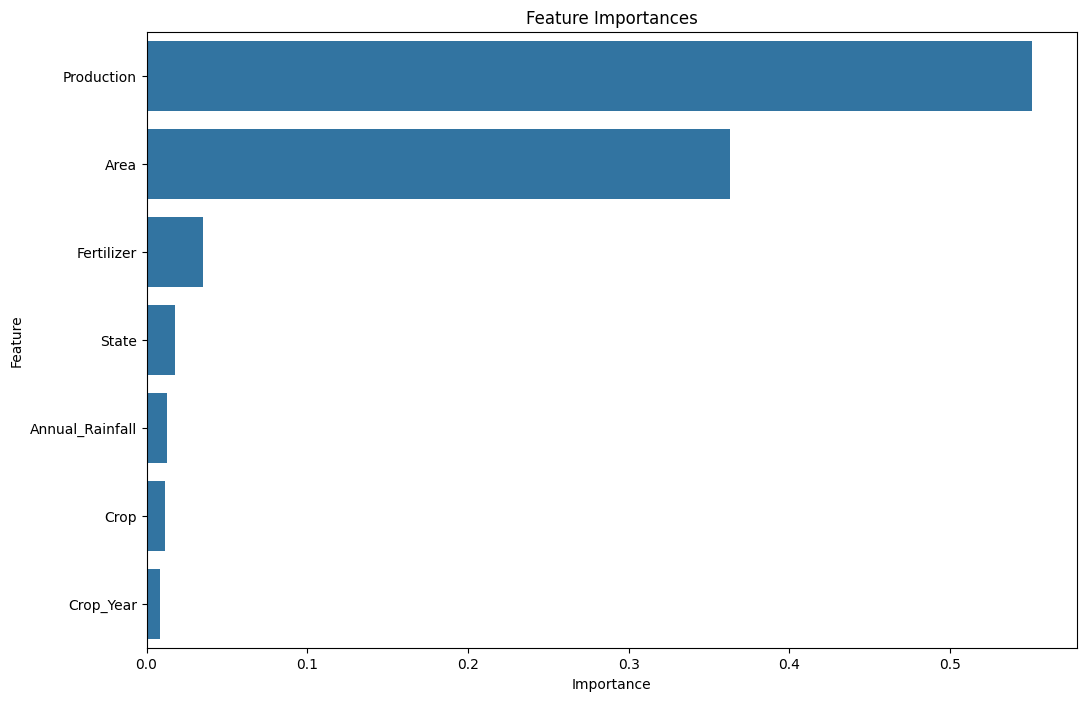

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print and plot the feature importances
print(importance_df)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()






## AS we can see yield is more dependent on Production and area which is true as mathematical formula for yield is production/area